In [1]:
import sys
sys.path.insert(0, '..')
import pyzx as zx
import cotengra as ctg
import quimb as qu
import random

In [2]:
N = 2
g = zx.qasm("""
qreg q[2];
cx q[0], q[1];
""").to_graph()

g.apply_state(N * '0')
g.apply_effect(N * '0')

In [3]:
zx.draw(g)

In [4]:
g.to_tensor()

array(1.+0.j)

In [5]:
tn = zx.quimb.to_quimb_tensor(g)
tn

<TensorNetwork(tensors=5, indices=6)>

In [6]:
tn.contract(output_inds=())

0.9999999999999996

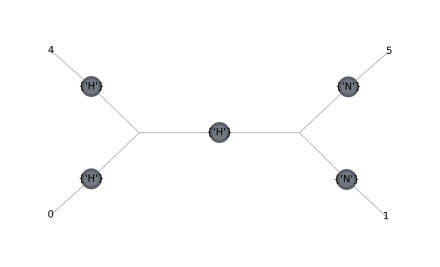

In [7]:
tn.draw()

In [99]:
random.seed(1338)
N = 50
g = zx.generate.cliffordT(N, 1500, p_t = 0.3)

g.apply_state(N * '0')
g.apply_effect(N * '0')
zx.full_reduce(g)
g.normalize()

In [100]:
zx.draw(g)

In [101]:
tn = zx.quimb.to_quimb_tensor(g)

In [102]:
tn

<TensorNetwork(tensors=2024, indices=149)>

In [103]:
tn.compress_simplify_(output_inds=(), progbar=True, equalize_norms=True)
#tn.full_simplify_('ADCRS', output_inds=(), progbar=True, equalize_norms=True)

S 1855, 113: : 10it [00:00, 19.74it/s] 
L 3484, 5226: : 6it [00:03,  1.56it/s]  
S 1180, 111: : 10it [00:04,  2.50it/s]  
L 3176, 4764: : 6it [00:04,  1.45it/s]  
S 1053, 111: : 10it [00:04,  2.35it/s]  
L 3116, 4674: : 6it [00:04,  1.48it/s]  
S 991, 111: : 10it [00:04,  2.30it/s]   
L 3100, 4650: : 6it [00:06,  1.03s/it]  
S 964, 111: : 10it [00:04,  2.16it/s]   
L 3090, 4635: : 6it [00:06,  1.01s/it]  
S 949, 111: : 10it [00:04,  2.30it/s]   
L 3088, 4632: : 6it [00:06,  1.05s/it]  
S 942, 111: : 10it [00:04,  2.21it/s]   


<TensorNetwork(tensors=942, indices=111)>

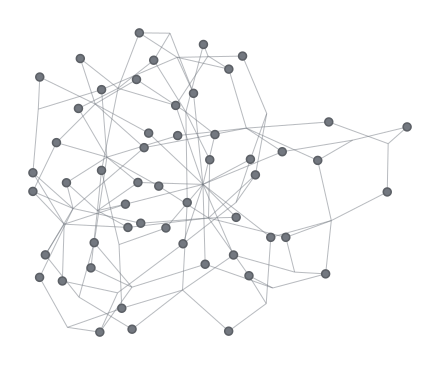

In [97]:
tn.draw()

In [98]:
tn.contraction_width(output_inds=())

12.0

In [90]:
opt = ctg.HyperOptimizer(progbar=True, max_time=5, reconf_opts={})

In [91]:
tree = tn.contraction_tree(output_inds=(), optimize=opt)

log2[SIZE]: 8.00 log10[FLOPs]: 3.72:  45%|████▍     | 57/128 [00:05<00:06, 11.17it/s]


In [37]:
tn.contract(optimize=tree.path(), output_inds=())

(1.052088771734752e-08+8.03929061111277e-09j)